# multi-wayExamples - Psychometric Applications

Mentioned in 6.1 Scientific Computing Applications Ch6: Fundamentals of Tensor Analysis & Applications

Second Problem is a survey answers about happiness scores related to 3 conditions. This created a three-way contingency table has as its variables: Happiness reported by participants in a survey (i mode-1 : 3 categories), Number of siblings (j mode-2 : Siblings - 5 categories) and the Years of schooling completed (k mode-3 : Schooling - 4 categories). It is thus a frequency table containing in the cells the number of people with a particular combination of categories.
the data is stored in a dat file that reads a 2 dimensional matricised tensor, (12, 5), assuming that reshaping into (3, 4, 5) and swapping the mode-2 and mode-3 in the problem definition in https://three-mode.leidenuniv.nl/ will be ok
Will decompose with Tucker to find which rank gives the best fit.

In [2]:
import csv
import numpy as np

# read flash.dat to a list of lists
datContent = [i.strip().split() for i in open("data/Happiness.dat").readlines()]

X = np.array(datContent)
X.shape

(12, 5)

In [3]:
X = X.reshape(3, 4, 5)
X.shape

(3, 4, 5)

In [4]:
# doing Tucker decomposition
from tensorly.decomposition import tucker
import tensorly as tl
import math



def doTucker (X, rank):
    X = tl.tensor(X,dtype=float)
    core, factors = tucker(X, rank=rank)
    tucker_reconstruction_2 = tl.tucker_to_tensor((core, factors))

    tk_RMSE = math.sqrt(np.square(np.subtract(X,tucker_reconstruction_2)).mean() )
    print ("Tucker " + str(rank) + " RMSE = ", tk_RMSE)
    return core ,factors, tk_RMSE

In [5]:
# doing Tucker decomposition
from tensorly.decomposition import tucker
import tensorly as tl

ranks = []
tucker_RMSE=[]

for i in range(np.prod(X.shape)): # iterate through the flat index
    rank= np.unravel_index(i, X.shape) # get the multidimensional index to use as a rank, in case it does not contain a zero, this will traverse all possible ranks
    if np.all(rank):
        core ,factors, tk_RMSE = doTucker(X, rank)
        tucker_RMSE.append(tk_RMSE)
        ranks.append(str(rank))


max = np.argmin(tucker_RMSE)
print ("Lowest RMSE achieched at rank = " + ranks[max]) # this will show the full matrix rank, 

Tucker (1, 1, 1) RMSE =  12.598852747845193
Tucker (1, 1, 2) RMSE =  12.598852744280288
Tucker (1, 1, 3) RMSE =  12.59885274425921
Tucker (1, 1, 4) RMSE =  12.598852744251092
Tucker (1, 2, 1) RMSE =  12.598852744714836
Tucker (1, 2, 2) RMSE =  5.422717217988447
Tucker (1, 2, 3) RMSE =  5.422717217988797
Tucker (1, 2, 4) RMSE =  5.422717217989062
Tucker (1, 3, 1) RMSE =  12.59885274423082
Tucker (1, 3, 2) RMSE =  5.422717217988597
Tucker (1, 3, 3) RMSE =  5.194856418784413
Tucker (1, 3, 4) RMSE =  5.194852434187297
Tucker (2, 1, 1) RMSE =  12.598852747725521
Tucker (2, 1, 2) RMSE =  12.353237845601098
Tucker (2, 1, 3) RMSE =  12.353281907905794
Tucker (2, 1, 4) RMSE =  12.353162180049729
Tucker (2, 2, 1) RMSE =  12.26573244654067
Tucker (2, 2, 2) RMSE =  4.329851523834254
Tucker (2, 2, 3) RMSE =  4.163943381197409
Tucker (2, 2, 4) RMSE =  4.111071395674339
Tucker (2, 3, 1) RMSE =  12.26573242990964
Tucker (2, 3, 2) RMSE =  4.30706843030477
Tucker (2, 3, 3) RMSE =  4.013234749236351
Tuck

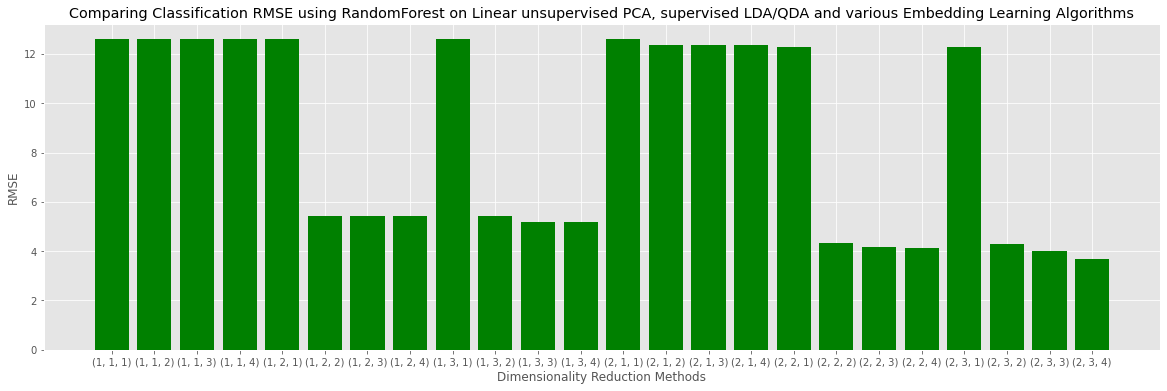

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure( figsize=(20,6))
plt.style.use('ggplot')

x_pos = [i for i, _ in enumerate(ranks)]

plt.bar(ranks, tucker_RMSE, color='green')
plt.xlabel("Dimensionality Reduction Methods")
plt.ylabel("RMSE")
plt.title("Comparing Classification RMSE using RandomForest on Linear unsupervised PCA, supervised LDA/QDA and various Embedding Learning Algorithms")

plt.xticks(x_pos, ranks)

plt.show()

## Looking at all possible ranks reconstruction error, it seems the highest errors occured when all modes were reduced, but when first mode only was reduced, the error was small, which means it is not very dominant in this dataset, and the third mode seems to be the most dominant.  

In the book ( Kroonenberg, P.M., 2008. Applied multi-way data analysis, Wiley series in probability and statistics. Wiley-Interscience, Hoboken, N.J.) the author showed that rank (2,2,2) was the most fit to this dataset, which is proven here as well. The software he used can be downloaded from https://three-mode.leidenuniv.nl/ , 